In [60]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

In [61]:
#selecting random image
query_img = 'Data/template_train/51.991368_4.372452.png'

source_img = 'Data/map_train/51.998766_4.374169.png'

base_path = os.path.dirname(os.getcwd())

query_img_path = os.path.join(base_path, query_img)
source_img_path = os.path.join(base_path, source_img)

In [62]:
# Helper function to load and preprocess an image
def load_image(image_path, input_size=224):
    preprocess = transforms.Compose([
        transforms.Resize((input_size, input_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert("RGB")
    return preprocess(image).unsqueeze(0)  # Add batch dimension

In [63]:
# Visualize a feature map
def visualize_feature_map(feature_map):
    feature_map = feature_map.squeeze(0)  # Remove batch dimension
    fig, axs = plt.subplots(5, 5, figsize=(15, 5))
    for i, ax in enumerate(axs.flat):
        if i < feature_map.shape[0]:  # Display only a few feature maps
            ax.imshow(feature_map[i].detach().cpu().numpy(), cmap='viridis')
            ax.axis('off')
    plt.show()

In [72]:
import torch
from torchvision import models

# Load pre-trained ResNet-50
resnet50 = models.resnet50(pretrained=True)

# Specify feature extraction layers
feature_layers = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4']

# Create a feature extractor function
def extract_features(model, layers, input_image):
    features = {}
    x = input_image
    for name, module in model.named_children():
        x = module(x)
        if name in layers:
            features[name] = x
        # Stop early if the last desired layer is reached
        if name == layers[-1]:
            break
    return features

q_image_tensor = load_image(query_img_path)  # Defined in earlier example
q_features = extract_features(resnet50, feature_layers, q_image_tensor)

s_image_tensor = load_image(source_img_path)  # Defined in earlier example
s_features = extract_features(resnet50, feature_layers, s_image_tensor)

c:\Users\Public\Documents\Vydar\Vydar\Non-GPS\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Public\Documents\Vydar\Vydar\Non-GPS\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [81]:
print(q_features[list(q_features.keys())[0]].squeeze(0).detach().numpy().flatten().shape)
print(q_features[list(q_features.keys())[1]].squeeze(0).detach().numpy().flatten().shape)
print(q_features[list(q_features.keys())[2]].squeeze(0).detach().numpy().flatten().shape)
print(q_features[list(q_features.keys())[3]].squeeze(0).detach().numpy().flatten().shape)
print(q_features[list(q_features.keys())[4]].squeeze(0).detach().numpy().shape)
print('')
print(s_features[list(s_features.keys())[0]].squeeze(0).detach().numpy().flatten().shape)
print(s_features[list(s_features.keys())[1]].squeeze(0).detach().numpy().flatten().shape)
print(s_features[list(s_features.keys())[2]].squeeze(0).detach().numpy().flatten().shape)
print(s_features[list(s_features.keys())[3]].squeeze(0).detach().numpy().flatten().shape)
print(s_features[list(s_features.keys())[4]].squeeze(0).detach().numpy().flatten().shape)

(802816,)
(802816,)
(401408,)
(200704,)
(2048, 7, 7)

(802816,)
(802816,)
(401408,)
(200704,)
(100352,)


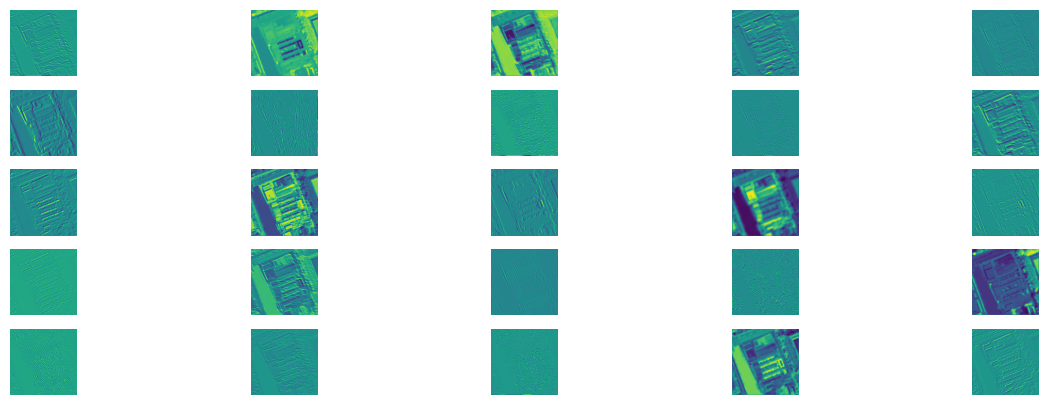

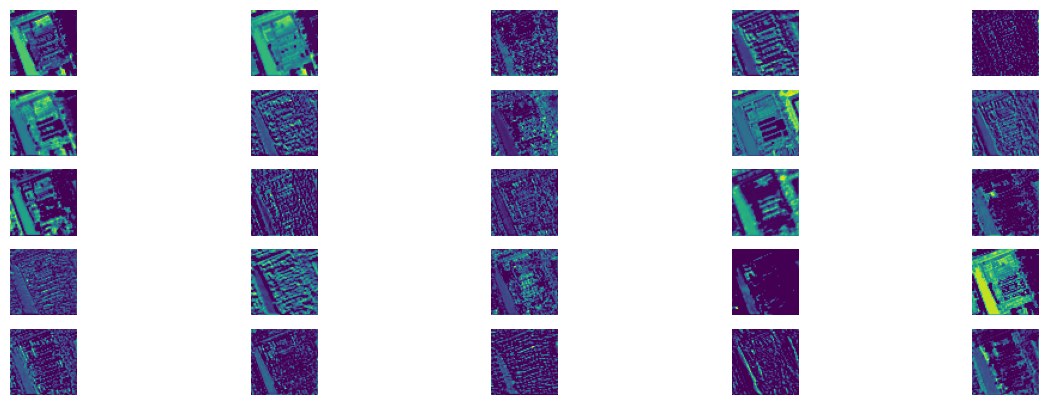

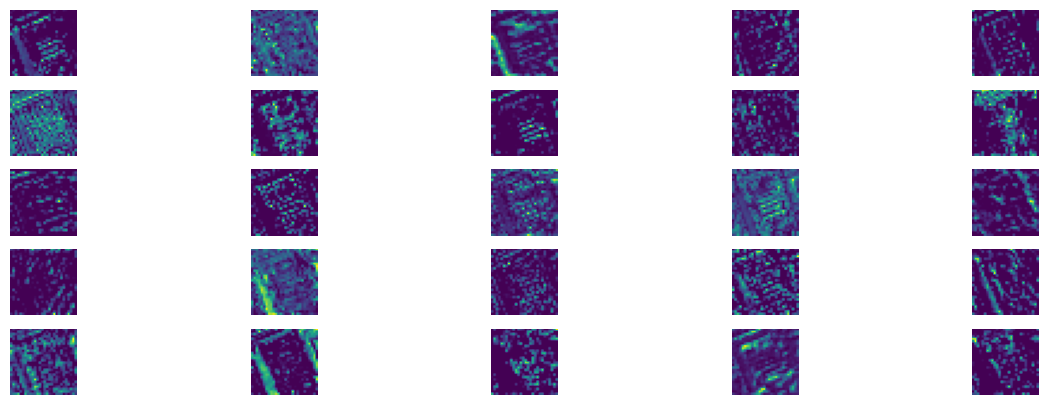

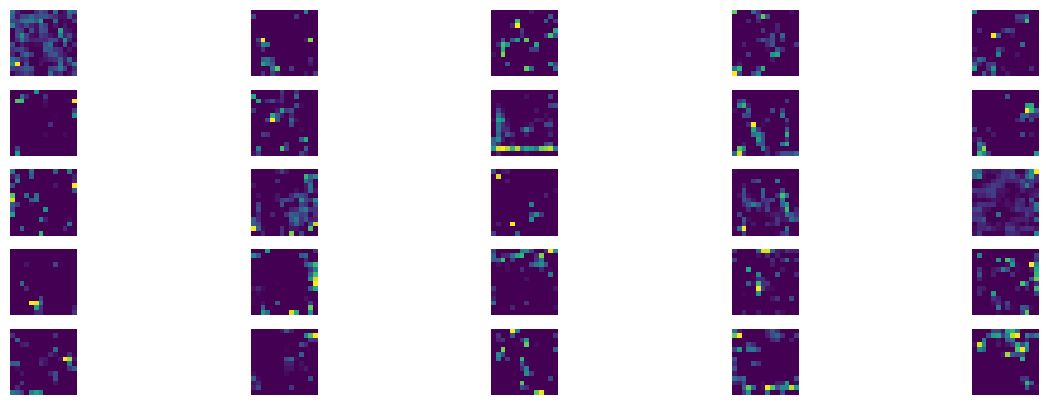

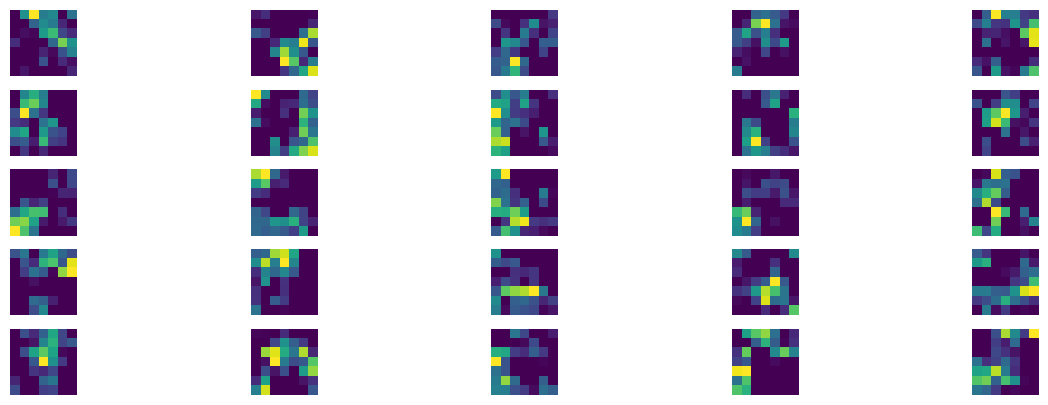

In [76]:
# Print feature shapes
for layer_name, feature_map in q_features.items():
    visualize_feature_map(feature_map)

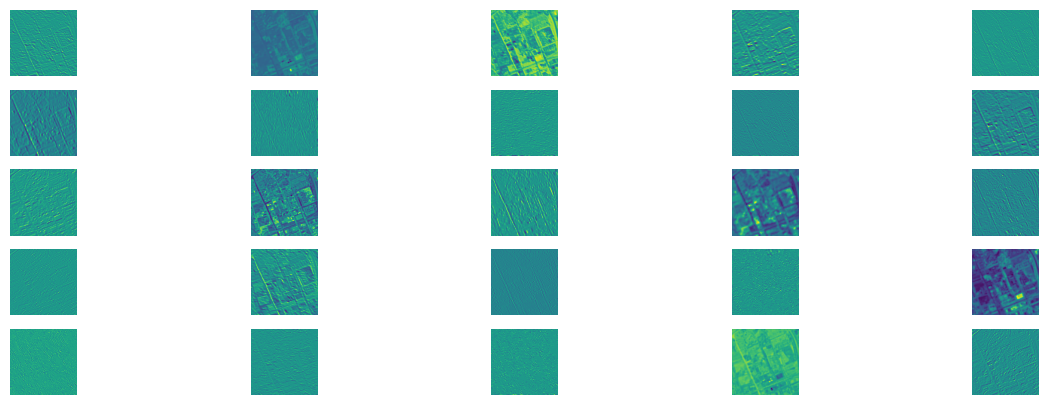

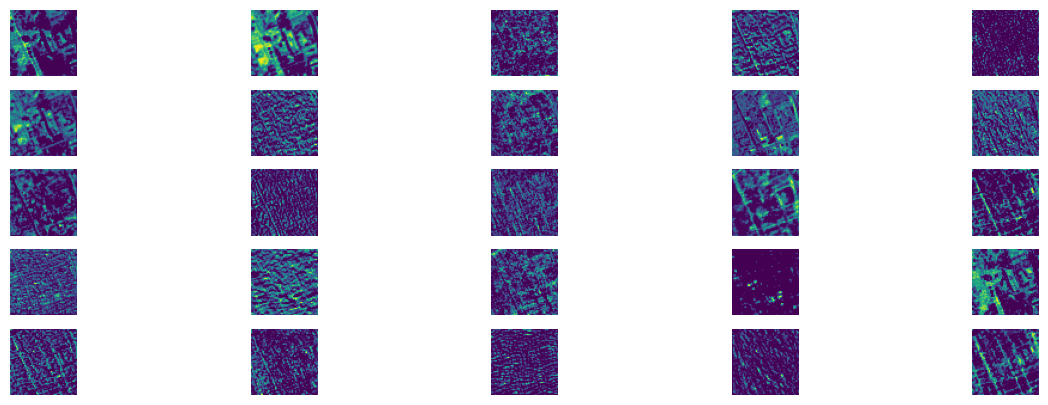

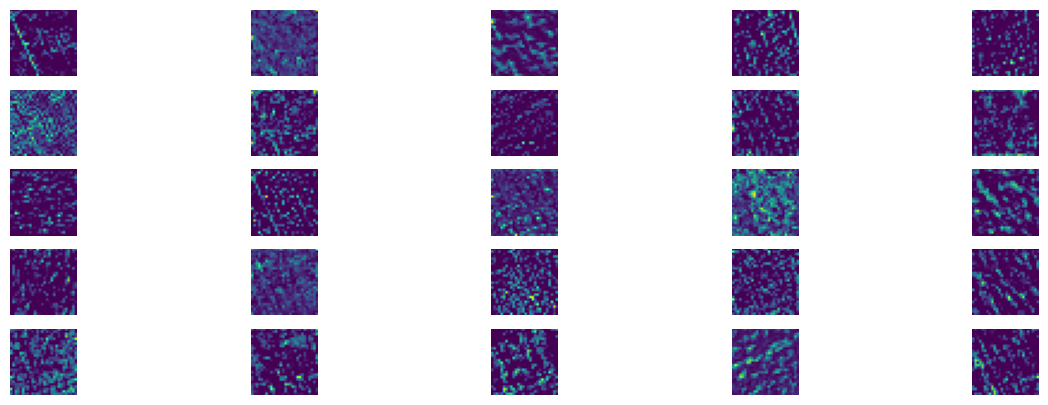

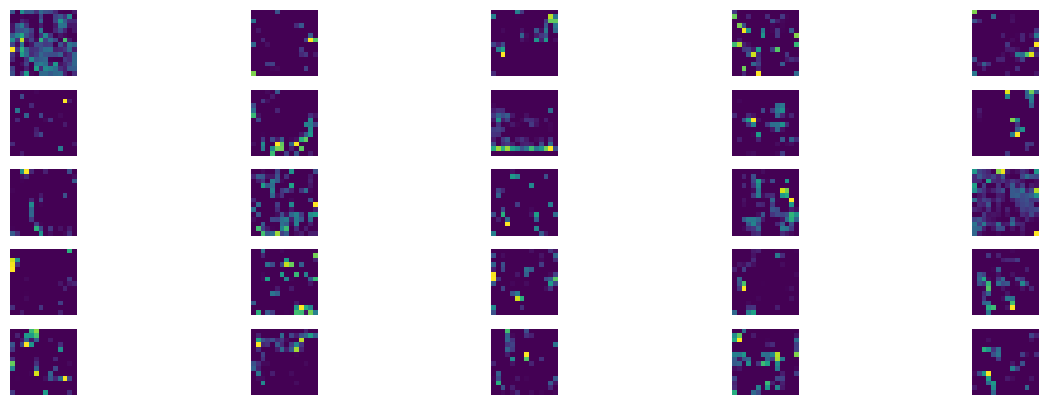

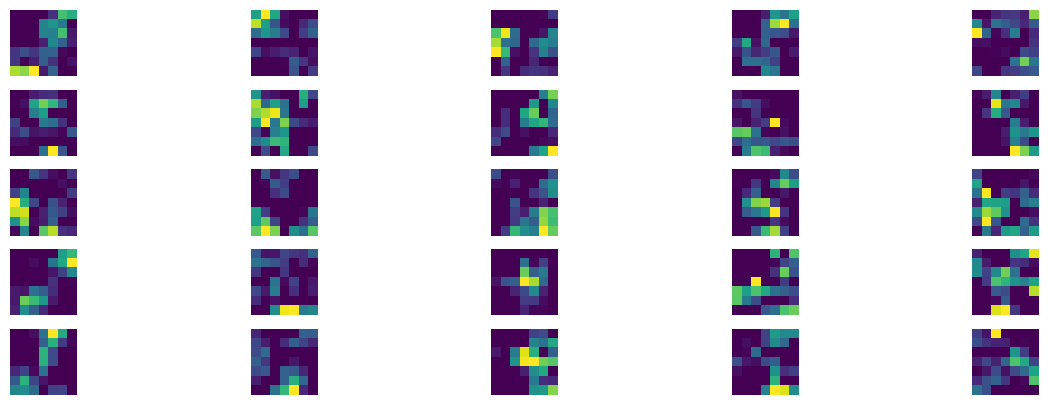

In [ ]:
# Print feature shapes
for layer_name, feature_map in s_features.items():
    visualize_feature_map(feature_map)